Hola Soy un Mark down de desenfoque wiiiiiii

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def desenfoqueSector(img, centro, x, y):
    img1 = np.copy(img)

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2

    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    imgMascara = cv2.bitwise_and(img, mascara)
    desenfoque = cv2.GaussianBlur(imgMascara, (45, 45), 0)

    img1[mascara != 0] = desenfoque[mascara != 0]

    return img1

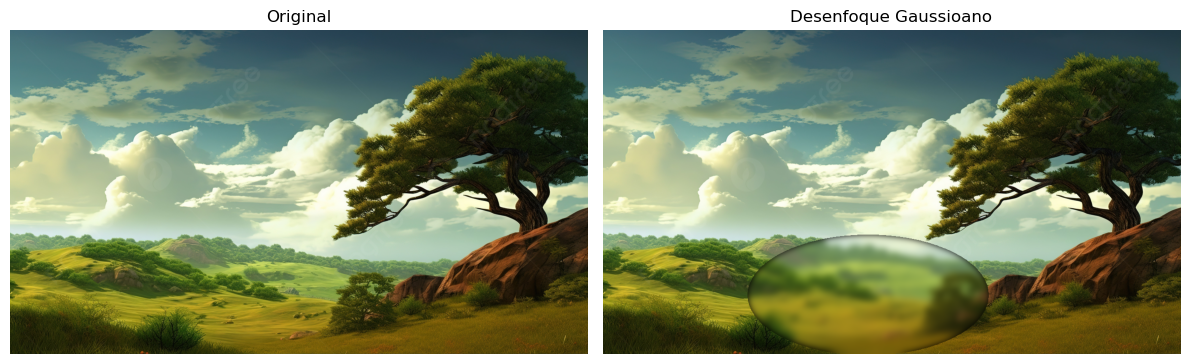

In [10]:
imagen = cv2.imread('..//img/img1e.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_fin = desenfoqueSector(imagen, (550, 550), 500, 250)



plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Desenfoque Gaussioano')
plt.imshow(img_fin)
plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
def desenfoqueInv(img, centro, x, y):
    img1 = np.copy(img)
    img2 = np.copy(img)
    valx, valy = centro
    mediox = x // 2
    medioy = y // 2

    mascara = np.zeros_like(img, dtype=np.uint8)

    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)

    imgMascara = cv2.bitwise_and(img, mascara)


    desenfoque = cv2.GaussianBlur(img2, (45, 45), 0)

    desenfoque[mascara != 0] = img1[mascara != 0]

    return desenfoque

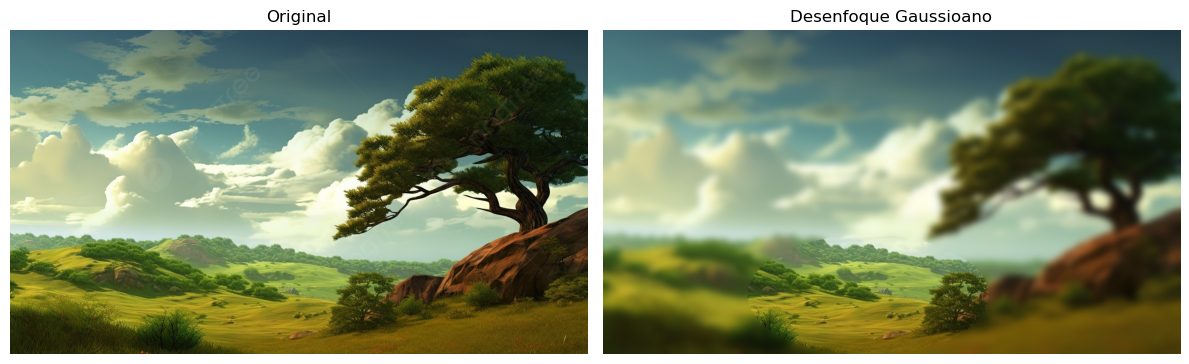

In [12]:
imagen = cv2.imread('..//img/img1e.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_fin = desenfoqueInv(imagen, (550, 550), 500, 250)



plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Desenfoque Gaussioano')
plt.imshow(img_fin)
plt.axis('off')

plt.tight_layout()
plt.show()

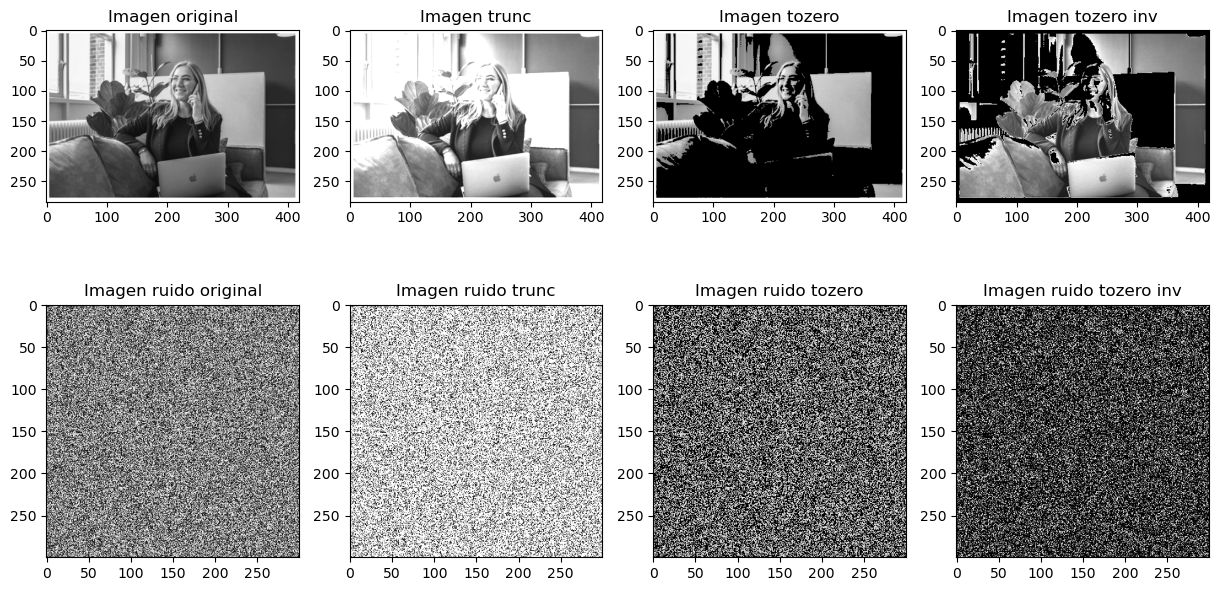

In [17]:
img = cv2.imread('..//img/thumbnail.png', 0)
# generando imagen random en escala de grises
img2 = np.random.randint(0, 256, (300, 300), dtype=np.uint8)

_, umb_trunc = cv2.threshold(img, 127, 200, cv2.THRESH_TRUNC)
_, umb_tozero = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO)
_, umb_tozero_inv = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO_INV)


_, umb_trunc2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TRUNC)
_, umb_tozero2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TOZERO)
_, umb_tozero_inv2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TOZERO_INV)

plt.figure(figsize = (15, 7.5))
plt.subplot(241)
plt.title('Imagen original')
plt.imshow(img, cmap='gray')

plt.subplot(242)
plt.title('Imagen trunc')
plt.imshow(umb_trunc, cmap='gray')

plt.subplot(243)
plt.title('Imagen tozero')
plt.imshow(umb_tozero, cmap='gray')

plt.subplot(244)
plt.title('Imagen tozero inv')
plt.imshow(umb_tozero_inv, cmap='gray')

plt.subplot(245)
plt.title('Imagen ruido original')
plt.imshow(img2, cmap='gray')

plt.subplot(246)
plt.title('Imagen ruido trunc')
plt.imshow(umb_trunc2, cmap='gray')

plt.subplot(247)
plt.title('Imagen ruido tozero')
plt.imshow(umb_tozero2, cmap='gray')

plt.subplot(248)
plt.title('Imagen ruido tozero inv')
plt.imshow(umb_tozero_inv2, cmap='gray')

plt.show()


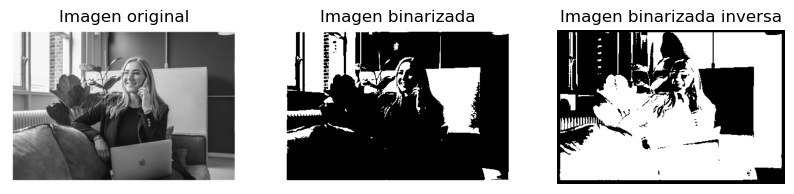

In [26]:
# Umbralizacon binaria y binaria invetida

imgB = cv2.imread('..//img/thumbnail.png', 0)
# aca estoy recogiendo la imagen y colocandola con umbralizacion binaria y ek guion bajo es una forama de declarar en python para una variable que no usaremos
# en el guion bajo va el umbral 
_, umbralB = cv2.threshold(imgB, 166, 255, cv2.THRESH_BINARY)
# Umbralizacion binaria inversa 
_, umbralBinv = cv2.threshold(imgB, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10, 5))
plt.subplot(131)
plt.title('Imagen original')
# plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB))
plt.imshow(imgB, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Imagen binarizada')
plt.imshow(umbralB, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Imagen binarizada inversa')
plt.imshow(umbralBinv, cmap='gray')
plt.axis('off')

plt.show()

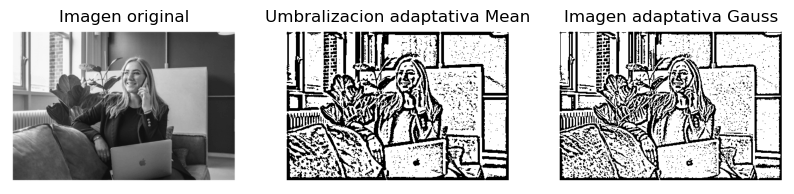

In [19]:
# Umbrales adapatados ahora

imgUA = cv2.imread('..//img/thumbnail.png', 0)
umb_adap = cv2.adaptiveThreshold(imgUA, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

umb_adap_gaus = cv2.adaptiveThreshold(imgUA, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize = (10, 5))
plt.subplot(131)
plt.title('Imagen original')
# plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB))
plt.imshow(imgUA, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Umbralizacion adaptativa Mean')
plt.imshow(umb_adap, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Imagen adaptativa Gauss')
plt.imshow(umb_adap_gaus, cmap='gray')
plt.axis('off')

plt.show()

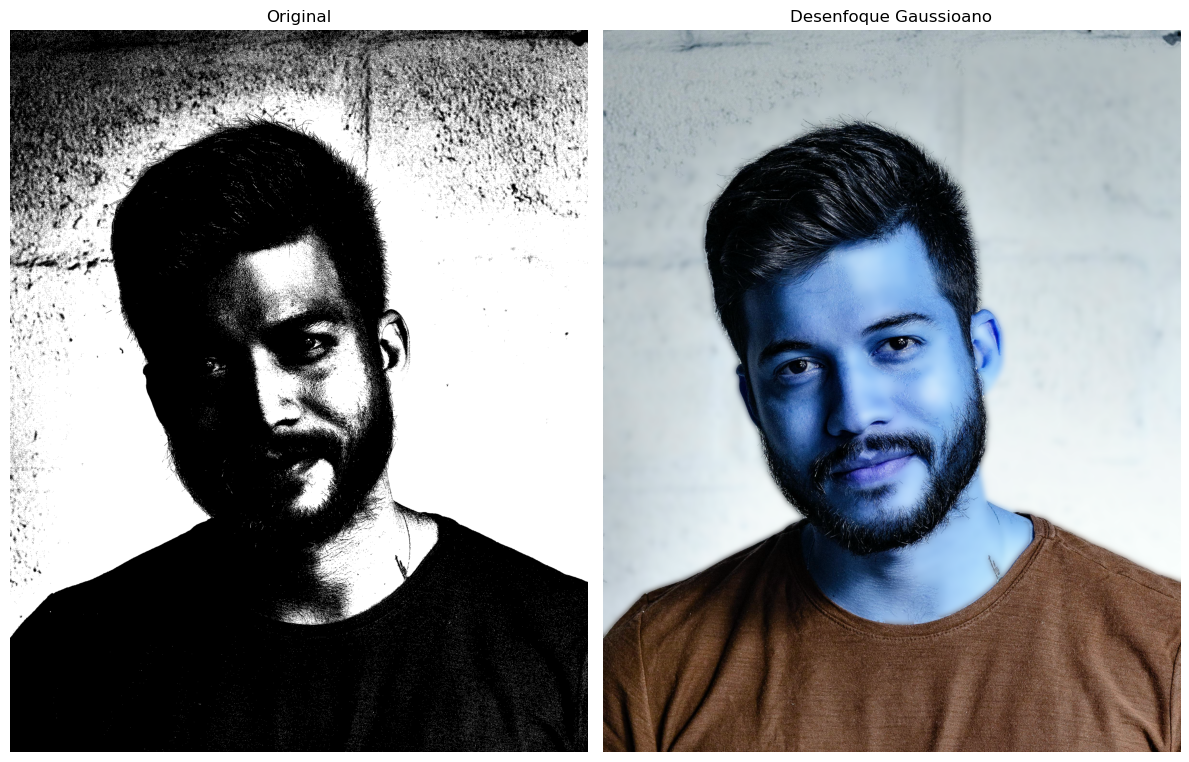

In [80]:
imagen = cv2.imread('..//img/3333.jpg')










imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# umb_adap_gaus = cv2.adaptiveThreshold(imagen_gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# _, umbralBinv = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY_INV)

_, umbral_binario = cv2.threshold(imagen_gris, 188, 255, cv2.THRESH_BINARY)

# _, umbral_binario = cv2.threshold(umbral_binario, 127, 255, cv2.THRESH_BINARY_INV)

mascara = np.zeros_like(umbral_binario, dtype=np.uint8)

contornos, _ = cv2.findContours(umbral_binario, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)







cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

kernel = np.ones((3, 3), np.uint8)

mascara = cv2.erode(mascara, kernel, iterations=2)

mascara = cv2.dilate(mascara, kernel, iterations=2)

imagen_desenfocada = cv2.GaussianBlur(imagen, (75, 75), 0)

imagen_final = np.copy(imagen)

imagen_final[mascara != 0] = imagen_desenfocada[mascara != 0]




















plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(umbral_binario, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Desenfoque Gaussioano')
plt.imshow(imagen_final)
plt.axis('off')

plt.tight_layout()
plt.show()

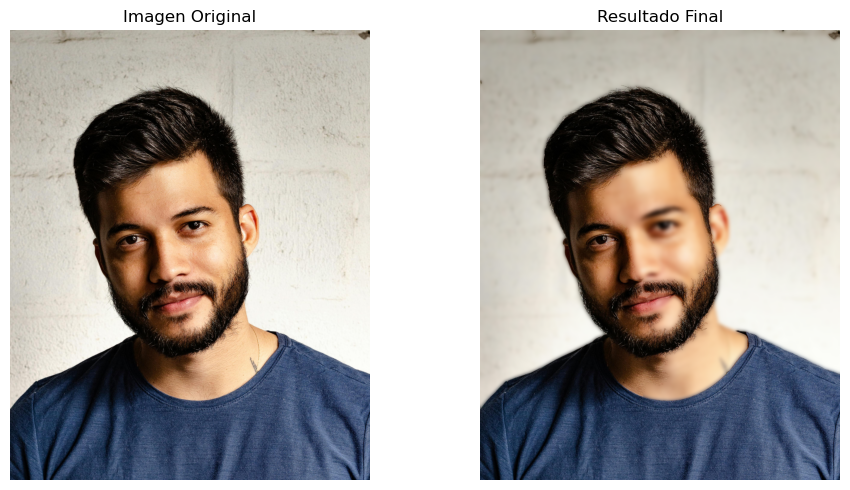

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('..//img/3333.jpg')

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbral_binario = cv2.threshold(imagen_gris, 150, 255, cv2.THRESH_BINARY)

mascara = np.zeros_like(umbral_binario, dtype=np.uint8)

contornos, _ = cv2.findContours(umbral_binario, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

kernel = np.ones((3, 3), np.uint8)

mascara = cv2.erode(mascara, kernel, iterations=2)
mascara = cv2.dilate(mascara, kernel, iterations=2)

imagen_desenfocada = cv2.GaussianBlur(imagen, (75, 75), 0)

imagen_final = np.copy(imagen)

imagen_final[mascara != 0] = imagen_desenfocada[mascara != 0]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_final, cv2.COLOR_BGR2RGB))
plt.title('Resultado Final')
plt.axis('off')

plt.tight_layout()
plt.show()


In [89]:
def conv_horizontal(img, mascara1):
    mascara = np.ones((1, mascara1), np.float32) / mascara1
    
    mascara[0, mascara1//2] = -1


    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

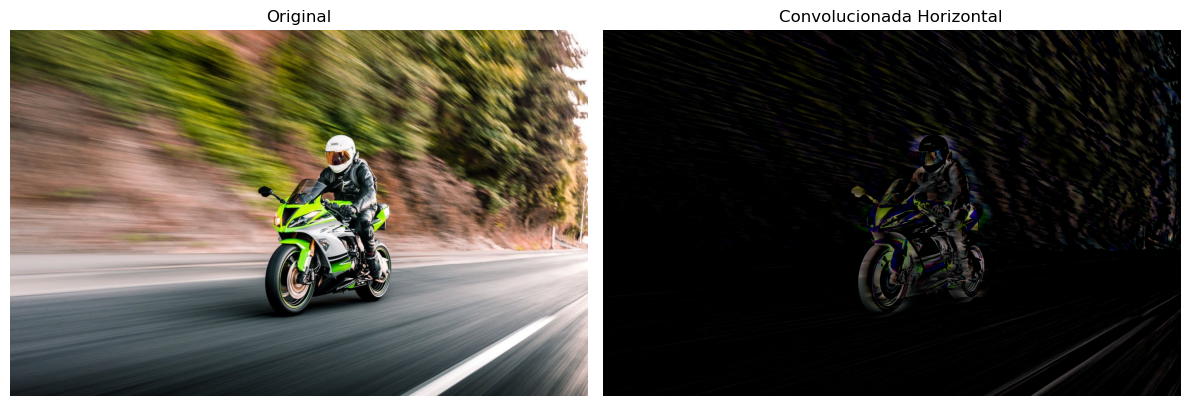

In [91]:
img = cv2.imread('..//img/motito.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_r = conv_horizontal(img_rgb[:,:,0], 51)
img_g = conv_horizontal(img_rgb[:,:,1], 51)
img_b = conv_horizontal(img_rgb[:,:,2], 51)

img_finh = np.stack((img_r, img_g, img_b), axis = 2)




plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Convolucionada Horizontal')
plt.imshow(img_finh)
plt.axis('off')


plt.tight_layout()
plt.show()